In [1]:
import pandas as pd
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

### Using pickle to load the housing.pkl file
    Column 1 is size of flat in square feet
    Column 2 is number of rooms \n
    Column 3 is price in Euros 

In [2]:
import pickle
Housing_data = pickle.load( open( "./housing.pkl", "rb" ) )
print(Housing_data)

[[  1710      3 208500]
 [  1262      3 181500]
 [  1786      3 223500]
 ...
 [  2340      4 266500]
 [  1078      2 142125]
 [  1256      3 147500]]


### Converting size from feet to hundred metresquare and price in thousand euros

In [3]:
h_data1 = np.hstack(((Housing_data[:,0]*0.3048**2/100).reshape((len(Housing_data),1)),(Housing_data[:,1]).reshape((len(Housing_data),1)), (Housing_data[:,2]/1000).reshape((len(Housing_data),1))))  
print(h_data1)

[[  1.58864198   3.         208.5       ]
 [  1.17243636   3.         181.5       ]
 [  1.65924829   3.         223.5       ]
 ...
 [  2.17393114   4.         266.5       ]
 [  1.00149477   2.         142.125     ]
 [  1.16686218   3.         147.5       ]]


### Check to see NAN values and datatype of the dataset

In [4]:
print(np.isnan(h_data1).sum())
print(h_data1.dtype)

0
float64


### Before initialize our model, as a part of EDA its better to visualize the data, Visualizing using matplot

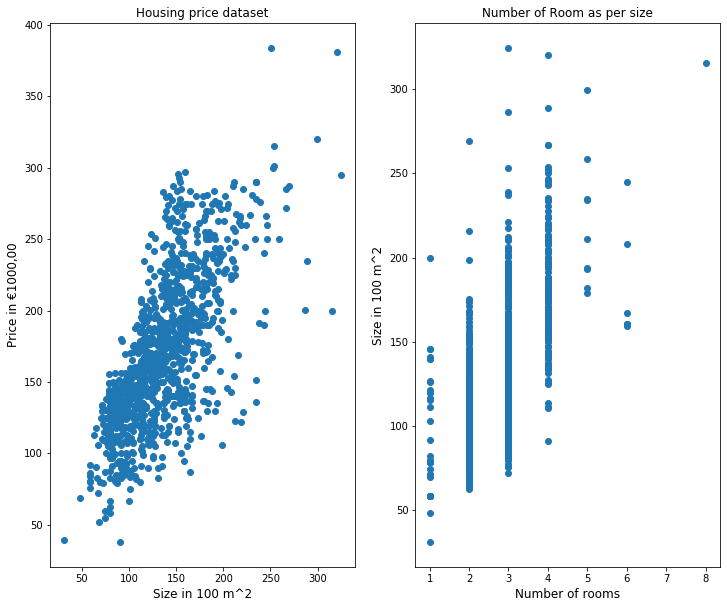

In [5]:
fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.subplot(1,2,1)
plt.title('Housing price dataset', fontsize=12) 
plt.ylabel('Price in €1000,00', fontsize=12)
plt.xlabel('Size in 100 m^2', fontsize=12)
plt.scatter(h_data1[:,0]*100, h_data1[:,2])

plt.subplot(1,2,2)
plt.title('Number of Room as per size', fontsize=12) 
plt.xlabel('Number of rooms', fontsize=12)
plt.ylabel('Size in 100 m^2', fontsize=12)
plt.scatter(h_data1[:,1], h_data1[:,0]*100)
plt.show()

### Defining linear regression models with input and output dimension. Taking input as dimension of data and ouput.

In [6]:
input_size = 2
output_size = 1
model = nn.Sequential()
model.add_module("layer_1", nn.Linear(input_size,output_size))
print(model)

Sequential(
  (layer_1): Linear(in_features=2, out_features=1, bias=True)
)


Defining learning rate, epochs and loss function for our model


In [7]:
lr_rate = 0.1
criterion = nn.MSELoss()# Mean Squared Loss
l_rate = 0.2
optimiser = torch.optim.Adam(model.parameters(), lr=lr_rate)#Using Adam to optimize the data
epochs = 500

### Scaling data to get faster convergence

[[ 0.56415713  0.17789702]
 [-0.44228578  0.17789702]
 [ 0.73489298  0.17789702]
 ...
 [ 1.97946748  1.46468547]
 [-0.85564626 -1.10889143]
 [-0.45576492  0.17789702]]


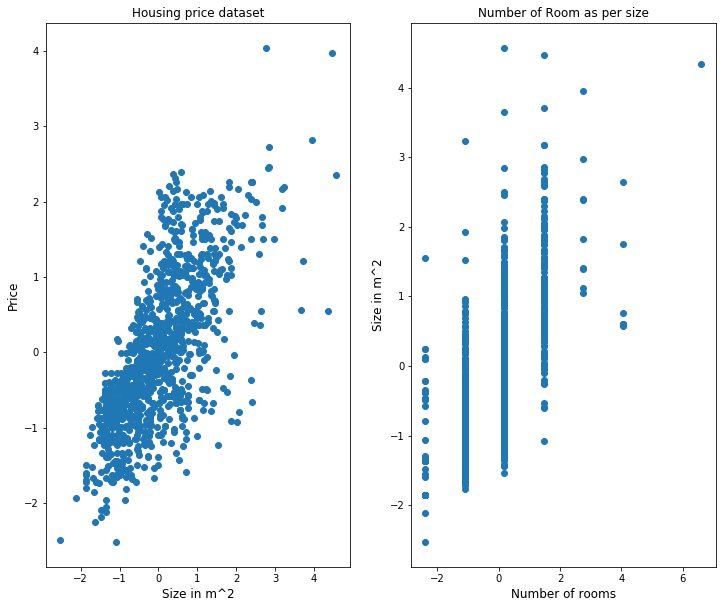

In [8]:
x_train = h_data1[:,:-1]
x_train = x_train.reshape((len(x_train),2))
y_correct = h_data1[:,2]
y_correct = y_correct.reshape((len(y_correct),1))

size = np.array(x_train[:,0], copy=True)
mu1 = np.mean(size)
std1 = np.std(size)
size = (size-mu1)/std1

#print(size)
room = np.array(x_train[:,1], copy=True)
mu2 = np.mean(room)
std2 = np.std(room)
room = (room-mu2)/std2
#print(room)

muy = np.mean(y_correct[:,0])
stdy = np.std(y_correct[:,0])
y_correct = (y_correct-muy)/stdy
#print(y_correct)

x_train = np.concatenate((size.reshape((len(y_correct),1)),room.reshape((len(y_correct),1))), axis=1)
print(x_train)

fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.subplot(1,2,1)
plt.title('Housing price dataset', fontsize=12) 
plt.ylabel('Price', fontsize=12)
plt.xlabel('Size in m^2', fontsize=12)
plt.scatter(x_train[:,0], y_correct)

plt.subplot(1,2,2)
plt.title('Number of Room as per size', fontsize=12) 
plt.xlabel('Number of rooms', fontsize=12)
plt.ylabel('Size in m^2', fontsize=12)
plt.scatter(x_train[:,1], x_train[:,0])
plt.show()

### Starting training loop. Forward loop, then we will measure the loss using criterion and then we will do backpropogation using autograd

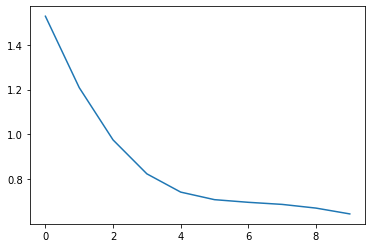

epoch 9, loss 0.645293116569519
OrderedDict([('layer_1.weight', tensor([[0.6727, 0.1489]])), ('layer_1.bias', tensor([-0.1692]))])


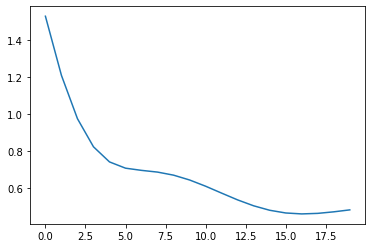

epoch 19, loss 0.48434996604919434
OrderedDict([('layer_1.weight', tensor([[ 0.9329, -0.4527]])), ('layer_1.bias', tensor([0.0973]))])


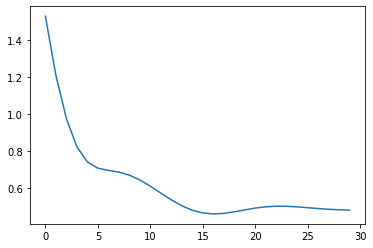

epoch 29, loss 0.4831242561340332
OrderedDict([('layer_1.weight', tensor([[ 1.0139, -0.3836]])), ('layer_1.bias', tensor([-0.0492]))])


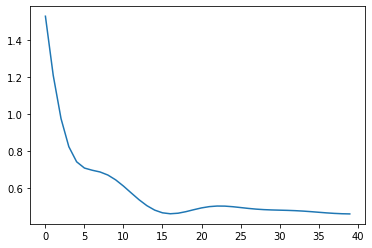

epoch 39, loss 0.4617593288421631
OrderedDict([('layer_1.weight', tensor([[ 0.8516, -0.2653]])), ('layer_1.bias', tensor([0.0246]))])


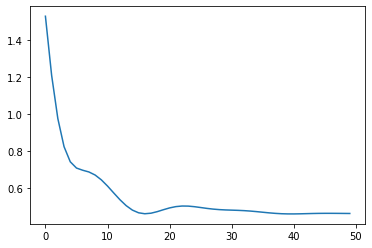

epoch 49, loss 0.4640459418296814
OrderedDict([('layer_1.weight', tensor([[ 0.7913, -0.2252]])), ('layer_1.bias', tensor([-0.0141]))])


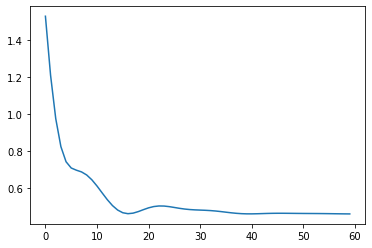

epoch 59, loss 0.4613664746284485
OrderedDict([('layer_1.weight', tensor([[ 0.8485, -0.2585]])), ('layer_1.bias', tensor([0.0096]))])


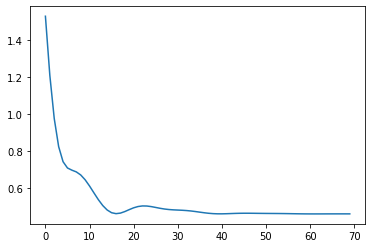

epoch 69, loss 0.461471825838089
OrderedDict([('layer_1.weight', tensor([[ 0.8700, -0.2893]])), ('layer_1.bias', tensor([-0.0070]))])


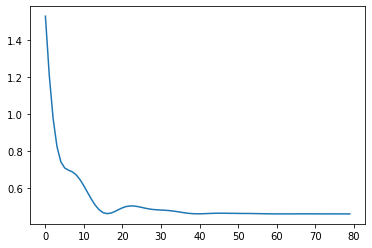

epoch 79, loss 0.46110251545906067
OrderedDict([('layer_1.weight', tensor([[ 0.8533, -0.2689]])), ('layer_1.bias', tensor([0.0049]))])


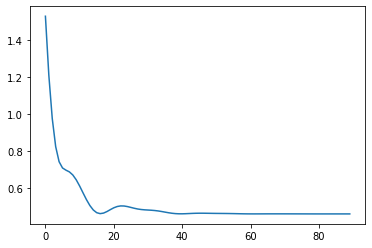

epoch 89, loss 0.46111801266670227
OrderedDict([('layer_1.weight', tensor([[ 0.8442, -0.2620]])), ('layer_1.bias', tensor([-0.0028]))])


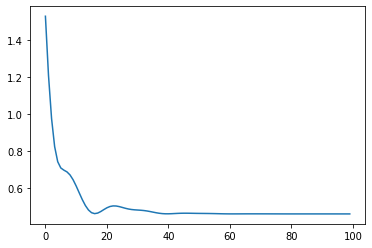

epoch 99, loss 0.4610632061958313
OrderedDict([('layer_1.weight', tensor([[ 0.8520, -0.2703]])), ('layer_1.bias', tensor([0.0011]))])


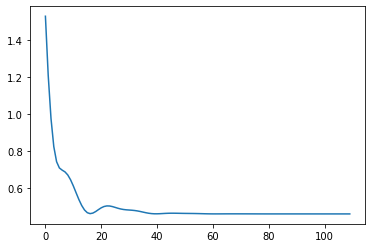

epoch 109, loss 0.4610670506954193
OrderedDict([('layer_1.weight', tensor([[ 0.8543, -0.2701]])), ('layer_1.bias', tensor([6.1158e-05]))])


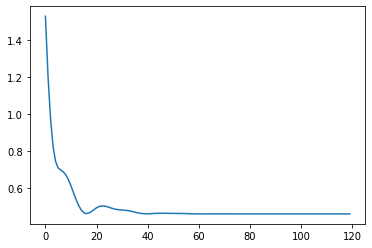

epoch 119, loss 0.46106183528900146
OrderedDict([('layer_1.weight', tensor([[ 0.8501, -0.2684]])), ('layer_1.bias', tensor([-0.0005]))])


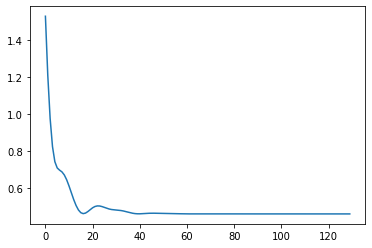

epoch 129, loss 0.46106135845184326
OrderedDict([('layer_1.weight', tensor([[ 0.8512, -0.2680]])), ('layer_1.bias', tensor([0.0004]))])


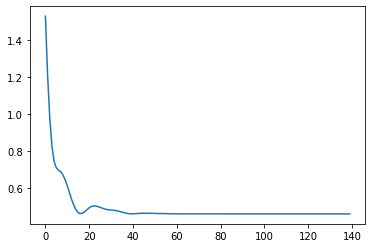

epoch 139, loss 0.46106091141700745
OrderedDict([('layer_1.weight', tensor([[ 0.8520, -0.2693]])), ('layer_1.bias', tensor([-9.1661e-05]))])


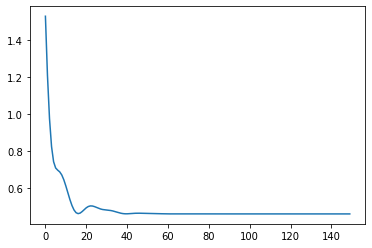

epoch 149, loss 0.46106070280075073
OrderedDict([('layer_1.weight', tensor([[ 0.8514, -0.2687]])), ('layer_1.bias', tensor([-7.9851e-05]))])


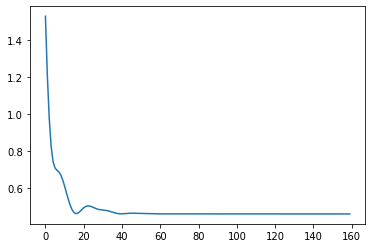

epoch 159, loss 0.46106067299842834
OrderedDict([('layer_1.weight', tensor([[ 0.8514, -0.2685]])), ('layer_1.bias', tensor([7.8309e-05]))])


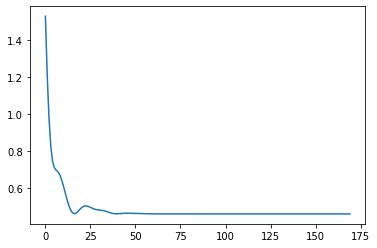

epoch 169, loss 0.46106067299842834
OrderedDict([('layer_1.weight', tensor([[ 0.8516, -0.2689]])), ('layer_1.bias', tensor([-7.5717e-06]))])


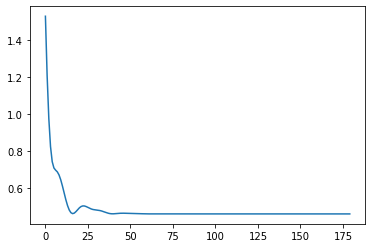

epoch 179, loss 0.4610605537891388
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-2.5542e-05]))])


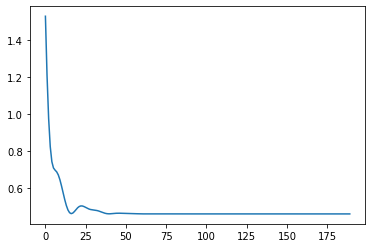

epoch 189, loss 0.46106064319610596
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2687]])), ('layer_1.bias', tensor([1.0425e-05]))])


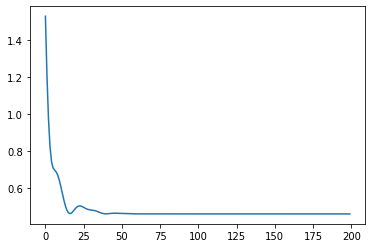

epoch 199, loss 0.46106070280075073
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([6.8363e-06]))])


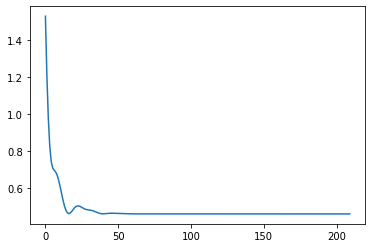

epoch 209, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-4.7031e-06]))])


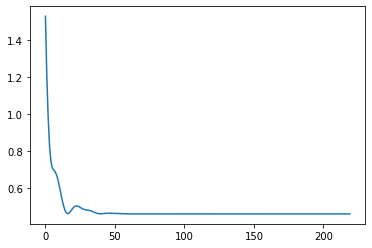

epoch 219, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2687]])), ('layer_1.bias', tensor([-2.1300e-06]))])


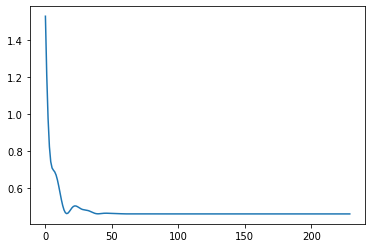

epoch 229, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([1.6267e-06]))])


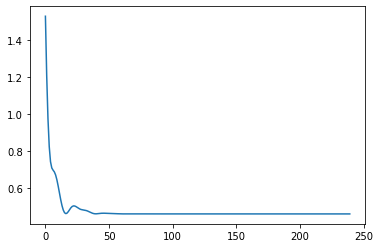

epoch 239, loss 0.4610605537891388
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([8.7535e-07]))])


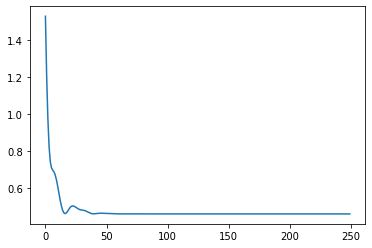

epoch 249, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-4.5263e-07]))])


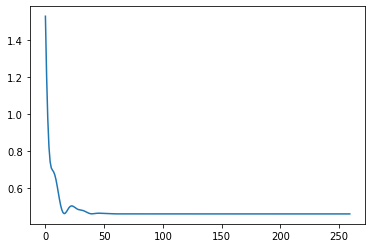

epoch 259, loss 0.46106046438217163
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-3.9380e-07]))])


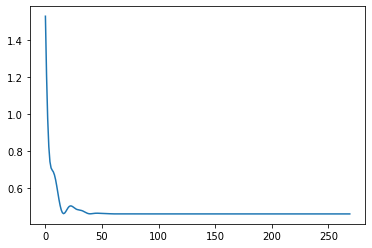

epoch 269, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([3.7677e-08]))])


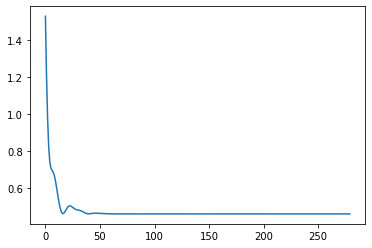

epoch 279, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([1.4327e-07]))])


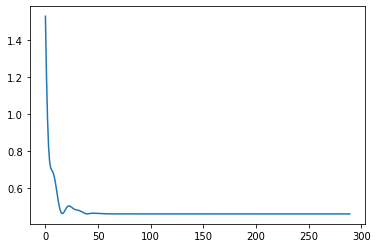

epoch 289, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([3.2012e-08]))])


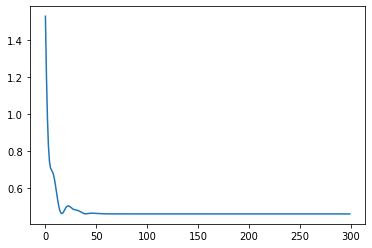

epoch 299, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-4.2391e-08]))])


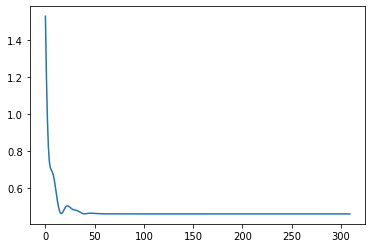

epoch 309, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-2.8417e-08]))])


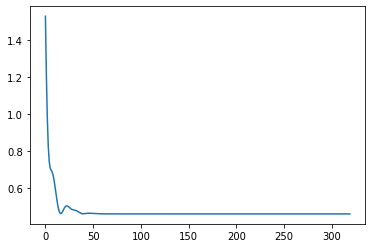

epoch 319, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-6.2709e-10]))])


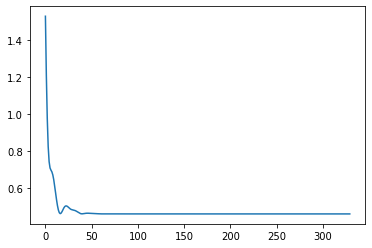

epoch 329, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-8.6104e-09]))])


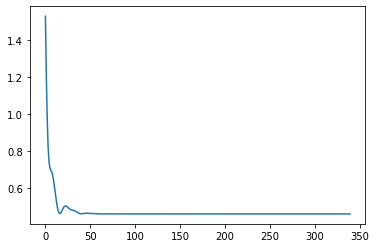

epoch 339, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-8.6435e-09]))])


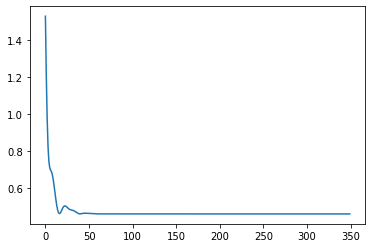

epoch 349, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-1.2860e-08]))])


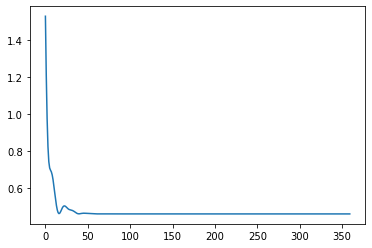

epoch 359, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-1.3007e-08]))])


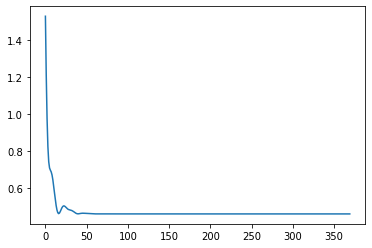

epoch 369, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-9.2654e-09]))])


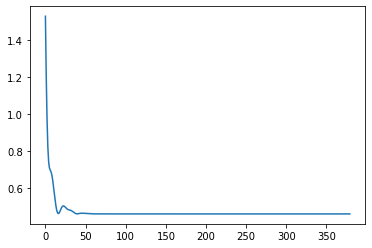

epoch 379, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-8.5040e-09]))])


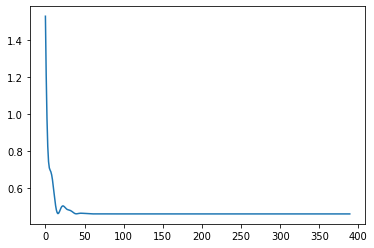

epoch 389, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-1.3861e-08]))])


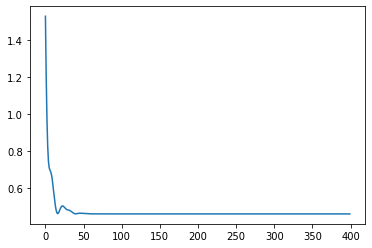

epoch 399, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-1.4437e-08]))])


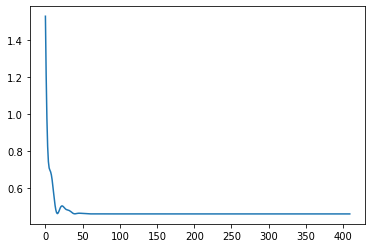

epoch 409, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-1.4054e-08]))])


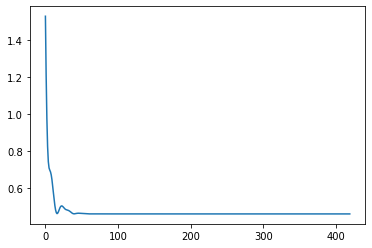

epoch 419, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-1.3245e-08]))])


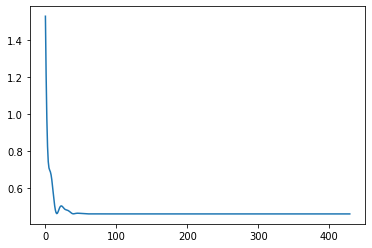

epoch 429, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-1.1291e-08]))])


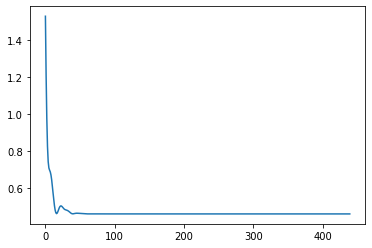

epoch 439, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-1.1377e-08]))])


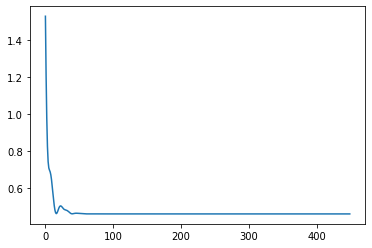

epoch 449, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-1.5712e-08]))])


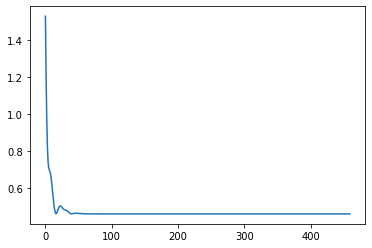

epoch 459, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-1.1955e-08]))])


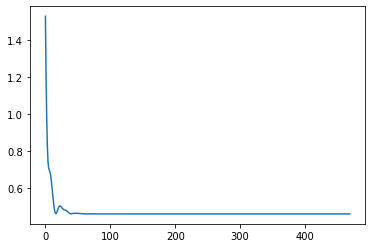

epoch 469, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-9.6210e-09]))])


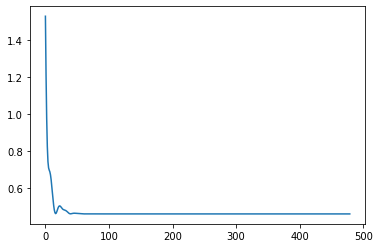

epoch 479, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-1.1442e-08]))])


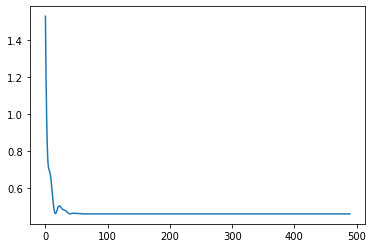

epoch 489, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-9.9458e-09]))])


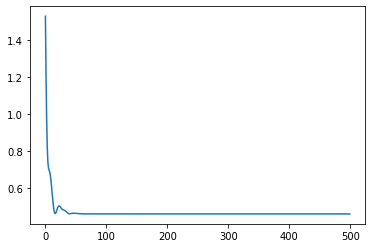

epoch 499, loss 0.4610605239868164
OrderedDict([('layer_1.weight', tensor([[ 0.8515, -0.2688]])), ('layer_1.bias', tensor([-1.6636e-08]))])


In [9]:
save_loss = []
coeffLoss = []
for epoch in range(epochs):

    inputs = Variable(torch.from_numpy(x_train)).float()
    labels = Variable(torch.from_numpy(y_correct)).float()

    #clear grads
    optimiser.zero_grad()
    #forward to get predicted values

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    save_loss.append(loss.item())
         
    if (epoch+1) % 10 == 0:
        plt.figure()
        plt.plot(save_loss)
        plt.show()
        print('epoch {}, loss {}'.format(epoch,loss.item()))
        coeffs = model.state_dict()
        print(coeffs)
        t0 =  coeffs['layer_1.bias'].cpu().numpy().item()
        t1 =  coeffs['layer_1.weight']
        coeffLoss.append( np.hstack([t0, t1[0][0].cpu().numpy().item(), t1[0][1].cpu().numpy().item(), loss.item() ]) )

### Making Prediction with the trained Model

In [10]:
step = np.random.randint(1000)
print("\n")
print("Input:")
print(mu1 + x_train[step,0]*std1, mu2 + x_train[step,1]*std2)
print("\n")
print("Prediction:")
print((muy + model(Variable(torch.from_numpy(x_train[step])).float())*stdy).item())
print("\n")
print("True:")
print((muy + y_correct[step]*stdy).item())
print("\n")
print("Error:")
print(str(100*np.abs((muy + y_correct[step]*stdy).item() - (muy + model(Variable(torch.from_numpy(x_train[step])).float())*stdy).item())/(muy + y_correct[step]*stdy).item()) + " %")



Input:
1.8905768640000002 3.0


Prediction:
226.51898193359375


True:
222.5


Error:
1.8062840150983146 %
